In [12]:
#importar las librerias

# Procesar la informacion
import pandas as pd
import numpy as np

# Visualizacion del arbol
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Regresion Logistica
from sklearn.tree import DecisionTreeClassifier #
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

# Evaluacion del Modelo
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
# Cargar el dataset
df = pd.read_excel('10Dataset_medico.xlsx')

In [23]:
#Obtener informacion del dataset - Etiquetas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Id                       100 non-null    int64  
 1   Cliente                  100 non-null    object 
 2   Ubicación                100 non-null    object 
 3   Genero                   84 non-null     object 
 4   Ubicacion                40 non-null     object 
 5   Fiebre                   100 non-null    int64  
 6   Tos                      100 non-null    int64  
 7   Dolor de Garganta        99 non-null     float64
 8   Congestión Nasal         98 non-null     object 
 9   Dificultad Respiratoria  100 non-null    object 
 10  Enfermedad               96 non-null     object 
dtypes: float64(1), int64(3), object(7)
memory usage: 8.7+ KB


In [22]:
df

,Id,Cliente,Ubicación,Genero,Ubicacion,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,Juan García,Medellin,Masculino,Copacabana,1,1,1.0,1,1,Gripe
1,2,María Pérez,Bello,Femenino,Medellin,0,1,0.0,1,1,Resfriado Común
2,3,Pedro Fernández,Copacabana,Masc,Sabaneta,0,0,0.0,1,1,Sinusitis
3,4,Ana Sánchez,Barbosa,F,Copacabana,1,1,1.0,1,1,Gripe
4,5,Luis González,Envigado,Hombre,0,0,1,0.0,1,1,Resfriado Común
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luis González,Envigado,Masc,NaN,0,1,0.0,NaN,1,Resfriado Común
96,97,Lucía Martínez,Medellin,Masc,NaN,0,0,0.0,1,1,Sinusitis
97,98,Diego López,Medellin,H,NaN,1,1,1.0,1,1,Gripe
98,99,Pedro Fernández,Copacabana,Hombre,NaN,0,1,0.0,1,1,NaN


#**Limpieza de datos**#

In [24]:
df.loc[(df['Enfermedad'] == 'Resfriado COMUN'),['Enfermedad']] = 'Resfriado Común'

In [25]:
modaEnfermedad = df['Enfermedad'].mode().iloc[0]
modaEnfermedad

'Sinusitis'

In [26]:
df['Enfermedad'].fillna(modaEnfermedad, inplace=True)

In [27]:
# Reemplazar los valores en las columnas correspondientes cuando "enfermedad" es "gripe"
columnas_a_actualizar = ['Fiebre', 'Tos', 'Dolor de Garganta', 'Congestión Nasal', 'Dificultad Respiratoria']
condicion = df['Enfermedad'] == 'Gripe'

for columna in columnas_a_actualizar:
    df.loc[condicion, columna] = 1

df

,Id,Cliente,Ubicación,Genero,Ubicacion,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,Juan García,Medellin,Masculino,Copacabana,1,1,1.0,1,1,Gripe
1,2,María Pérez,Bello,Femenino,Medellin,0,1,0.0,1,1,Resfriado Común
2,3,Pedro Fernández,Copacabana,Masc,Sabaneta,0,0,0.0,1,1,Sinusitis
3,4,Ana Sánchez,Barbosa,F,Copacabana,1,1,1.0,1,1,Gripe
4,5,Luis González,Envigado,Hombre,0,0,1,0.0,1,1,Resfriado Común
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luis González,Envigado,Masc,NaN,0,1,0.0,NaN,1,Resfriado Común
96,97,Lucía Martínez,Medellin,Masc,NaN,0,0,0.0,1,1,Sinusitis
97,98,Diego López,Medellin,H,NaN,1,1,1.0,1,1,Gripe
98,99,Pedro Fernández,Copacabana,Hombre,NaN,0,1,0.0,1,1,Sinusitis


In [28]:
# Reemplazar los valores en las columnas correspondientes cuando "enfermedad" es "resfriado común"
columnas_a_actualizar = [ 'Tos', 'Congestión Nasal', 'Dificultad Respiratoria']
columnas_cero = ['Fiebre', 'Dolor de Garganta']
condicion = df['Enfermedad'] == 'Resfriado Común'

for columna in columnas_a_actualizar:
    df.loc[condicion, columna] = 1

for colum in columnas_cero:
    df.loc[condicion, colum] = 0

df

,Id,Cliente,Ubicación,Genero,Ubicacion,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,Juan García,Medellin,Masculino,Copacabana,1,1,1.0,1,1,Gripe
1,2,María Pérez,Bello,Femenino,Medellin,0,1,0.0,1,1,Resfriado Común
2,3,Pedro Fernández,Copacabana,Masc,Sabaneta,0,0,0.0,1,1,Sinusitis
3,4,Ana Sánchez,Barbosa,F,Copacabana,1,1,1.0,1,1,Gripe
4,5,Luis González,Envigado,Hombre,0,0,1,0.0,1,1,Resfriado Común
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luis González,Envigado,Masc,NaN,0,1,0.0,1,1,Resfriado Común
96,97,Lucía Martínez,Medellin,Masc,NaN,0,0,0.0,1,1,Sinusitis
97,98,Diego López,Medellin,H,NaN,1,1,1.0,1,1,Gripe
98,99,Pedro Fernández,Copacabana,Hombre,NaN,0,1,0.0,1,1,Sinusitis


In [29]:
# Reemplazar los valores en las columnas correspondientes cuando "enfermedad" es "Sinusitis"
columnas_a_actualizar = ['Congestión Nasal', 'Dificultad Respiratoria']
columnas_cero = ['Fiebre', 'Tos', 'Dolor de Garganta']
condicion = df['Enfermedad'] == 'Sinusitis'

for columna in columnas_a_actualizar:
    df.loc[condicion, columna] = 1

for colum in columnas_cero:
    df.loc[condicion, colum] = 0

df

,Id,Cliente,Ubicación,Genero,Ubicacion,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,Juan García,Medellin,Masculino,Copacabana,1,1,1.0,1,1,Gripe
1,2,María Pérez,Bello,Femenino,Medellin,0,1,0.0,1,1,Resfriado Común
2,3,Pedro Fernández,Copacabana,Masc,Sabaneta,0,0,0.0,1,1,Sinusitis
3,4,Ana Sánchez,Barbosa,F,Copacabana,1,1,1.0,1,1,Gripe
4,5,Luis González,Envigado,Hombre,0,0,1,0.0,1,1,Resfriado Común
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luis González,Envigado,Masc,NaN,0,1,0.0,1,1,Resfriado Común
96,97,Lucía Martínez,Medellin,Masc,NaN,0,0,0.0,1,1,Sinusitis
97,98,Diego López,Medellin,H,NaN,1,1,1.0,1,1,Gripe
98,99,Pedro Fernández,Copacabana,Hombre,NaN,0,0,0.0,1,1,Sinusitis


In [30]:
# Convertir la columna 'Dolor de Garganta' a enteros
df['Dolor de Garganta'] = df['Dolor de Garganta'].astype(int)
df

,Id,Cliente,Ubicación,Genero,Ubicacion,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,Juan García,Medellin,Masculino,Copacabana,1,1,1,1,1,Gripe
1,2,María Pérez,Bello,Femenino,Medellin,0,1,0,1,1,Resfriado Común
2,3,Pedro Fernández,Copacabana,Masc,Sabaneta,0,0,0,1,1,Sinusitis
3,4,Ana Sánchez,Barbosa,F,Copacabana,1,1,1,1,1,Gripe
4,5,Luis González,Envigado,Hombre,0,0,1,0,1,1,Resfriado Común
...,...,...,...,...,...,...,...,...,...,...,...
95,96,Luis González,Envigado,Masc,NaN,0,1,0,1,1,Resfriado Común
96,97,Lucía Martínez,Medellin,Masc,NaN,0,0,0,1,1,Sinusitis
97,98,Diego López,Medellin,H,NaN,1,1,1,1,1,Gripe
98,99,Pedro Fernández,Copacabana,Hombre,NaN,0,0,0,1,1,Sinusitis


In [31]:
#Eliminar columnas innecesarias
columnas_drop = ['Id', 'Cliente', 'Ubicación', 'Genero', 'Ubicacion']
df = df.drop(columnas_drop, axis=1)
df

,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
0,1,1,1,1,1,Gripe
1,0,1,0,1,1,Resfriado Común
2,0,0,0,1,1,Sinusitis
3,1,1,1,1,1,Gripe
4,0,1,0,1,1,Resfriado Común
...,...,...,...,...,...,...
95,0,1,0,1,1,Resfriado Común
96,0,0,0,1,1,Sinusitis
97,1,1,1,1,1,Gripe
98,0,0,0,1,1,Sinusitis


## **Visualización de datos**

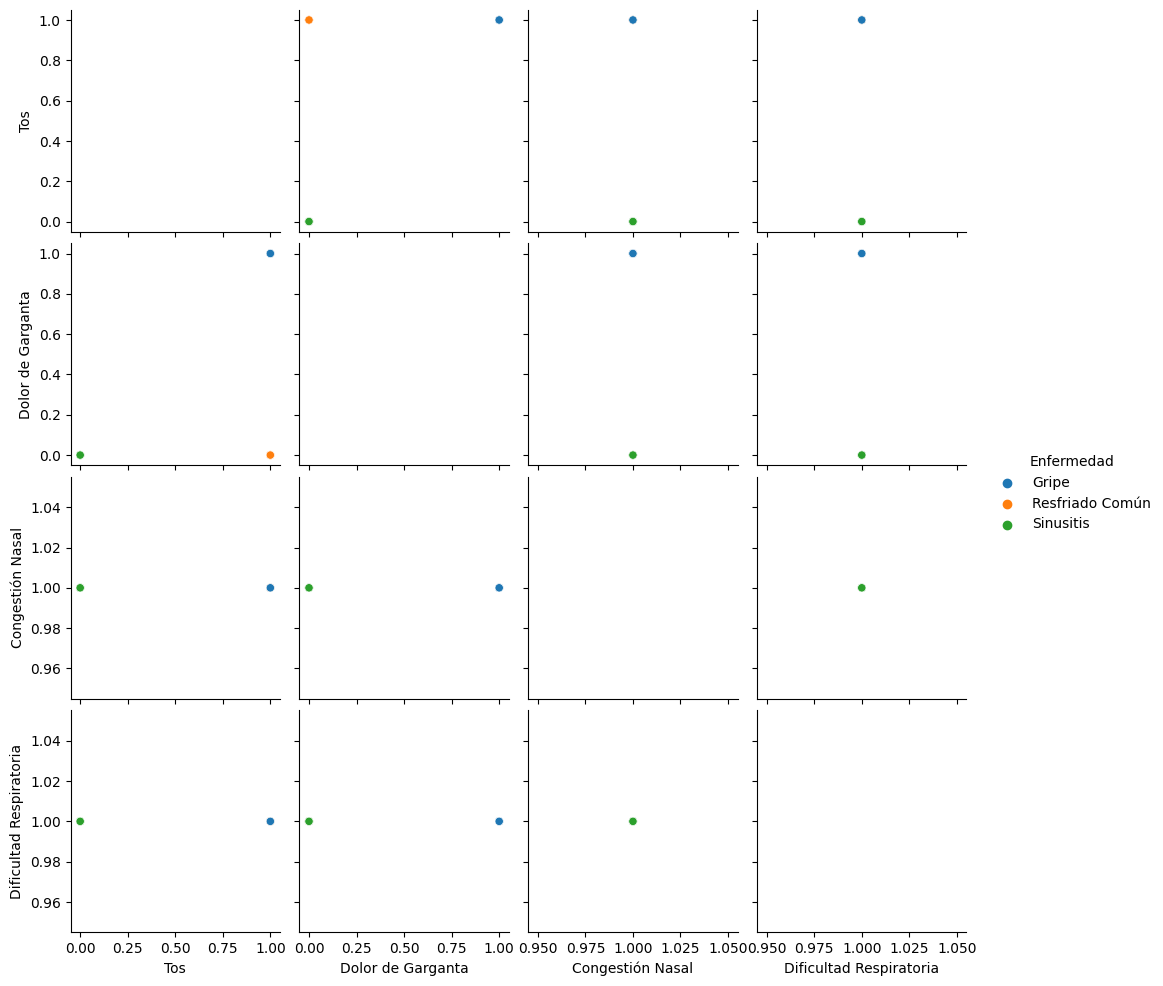

In [32]:
#Visualizacion de datos
sns.pairplot(df.iloc[:,1:],hue='Enfermedad')

# **Entrenamiento del modelo**

In [33]:
# Mezclar los datos
df = shuffle(df, random_state=2)

In [34]:
df

,Fiebre,Tos,Dolor de Garganta,Congestión Nasal,Dificultad Respiratoria,Enfermedad
83,0,0,0,1,1,Sinusitis
30,1,1,1,1,1,Gripe
56,0,1,0,1,1,Resfriado Común
24,0,1,0,1,1,Resfriado Común
16,0,1,0,1,1,Resfriado Común
...,...,...,...,...,...,...
43,1,1,1,1,1,Gripe
22,0,0,0,1,1,Sinusitis
72,1,1,1,1,1,Gripe
15,0,0,0,1,1,Sinusitis


In [37]:
# Seleccionar las variables relevantes para la regresión
variablees = ['Fiebre', 'Tos', 'Dolor de Garganta', 'Congestión Nasal', 'Dificultad Respiratoria']

X = df[variablees]
y = df['Enfermedad']

In [38]:
# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [39]:
# Crear el modelo de Clasificacion
model = DecisionTreeClassifier(random_state=13)

In [40]:
# Entrenar el modelo
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=13)

In [41]:
# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# **Evaluación del modelo**

In [42]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
print('Precisión del modelo: %.2f' % accuracy)

Precisión del modelo: 1.00


In [43]:
# Calcular la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print('Matriz de confusión:')
print(conf_matrix)

Matriz de confusión:
[[5 0 0]
 [0 7 0]
 [0 0 8]]


#**VISUALIZACIÓN DEL ÁRBOL DE CLASIFICACIÓN**


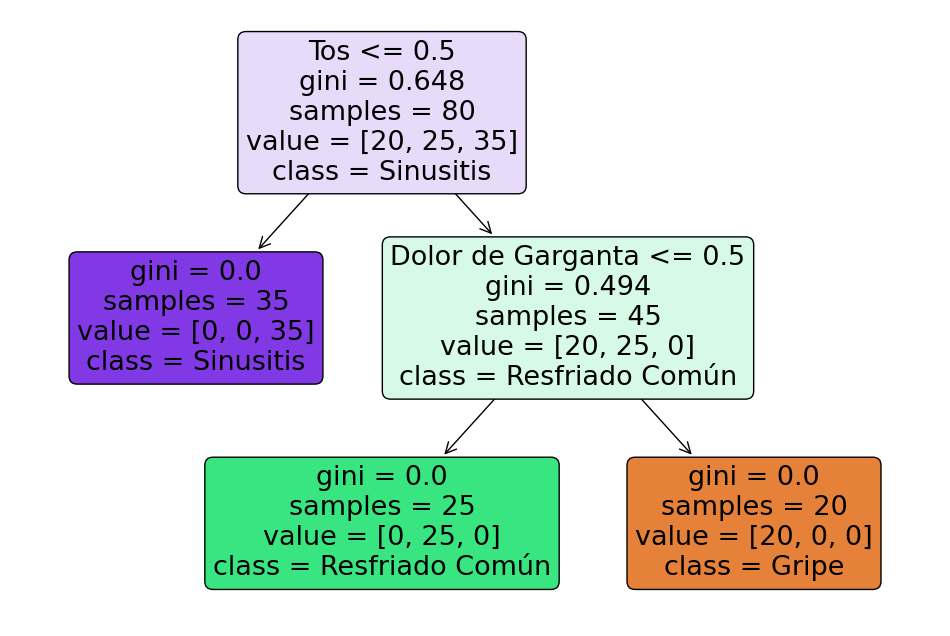

In [44]:
plt.figure(figsize=(12, 8))
plot_tree(model, feature_names=df.columns[:-1], class_names=model.classes_, filled=True, rounded=True)
plt.show()

# **PREDICIÓN FUTURA**

In [55]:
Fiebre = 0
Tos = 0
DolorGarganta = 0
CongestiónNasal = 1
DificultadRespiratoria = 1

In [56]:
# Valores futuros
new_sample = np.array([[Fiebre, Tos, DolorGarganta, CongestiónNasal, DificultadRespiratoria]])

# Realiza predicciones en las nuevas muestras utilizando el modelo de árbol de decisión
y_pred_new = model.predict(new_sample)

# y_pred_new contiene las etiquetas de clase predichas para las nuevas muestras
print(f"La Clasificacion de la enfermedad es: {y_pred_new[0]}")

La Clasificacion de la enfermedad es: Sinusitis


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [57]:
import pickle

# Guardar el modelo en un archivo
with open('ProyectoFinal_arbol.pkl', 'wb') as file:
    pickle.dump(model, file)